![title](https://pythonawesome.com/content/images/2018/05/scikit-learn.png)

In [1]:
# Standard imports.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from helpers_Garden import visualize_tree, plot_tree_interactive, randomized_tree_interactive

# Decision tree

Another classifier, further than logistic regression model is the well known and loved [_decision tree_](https://en.wikipedia.org/wiki/Decision_tree).

## A tree as an algorithm

A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. Though a commonly used tool in data mining for deriving a strategy to reach a particular goal, its also widely used in machine learning, which will be the main focus of this article.


For representing an algorithm as a tree let’s consider a very basic example that uses titanic data set for predicting whether a passenger will survive or not. Below model uses 3 features/attributes/columns from the data set, namely sex, age and sibsp (number of spouses or children along).

![title](https://www.researchgate.net/profile/Joop_Hox/publication/317307818/figure/fig2/AS:633029202571264@1527937331016/Decision-tree-on-Titanic-survival-data-Source-https-en.png)

A decision tree is drawn upside down with its root at the top. In the image above, the bold text in black represents a condition/internal node, based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf, in this case, whether the passenger died or survived.

Although, a real dataset will have a lot more features and this will just be a branch in a much bigger tree, but you can’t ignore the simplicity of this algorithm. The feature importance is clear and relations can be viewed easily. This methodology is more commonly known as learning decision tree from data and above tree is called Classification tree as the target is to classify passenger as survived or died. Regression trees are represented in the same manner, just they predict continuous values like price of a house. In general, Decision Tree algorithms are referred to as CART or Classification and Regression Trees.

_So, what is actually going on in the background?_ Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop. As a tree generally grows arbitrarily, you will need to trim it down for it to look beautiful.

There are several techniques to choose how effectively split a tree, we are going to see some of them later on, however, let's start with an example/exercise to see how a decision tree can be implemented in python.

## Exercise

In this exercise, you will build a classifier to predict whether the fruit is Apple or Orange.



The dataset of your problem is the following,

|Texture|Weight (g)|Label|
|----|----|----|
|Smooth|130|Apple |
|Rough |155|Orange|
|Rough |180|Orange|
|Smooth|135|Apple |
|Smooth|140|Apple |
|Smooth|110|Apple |
|Rough |170|Orange|

__Your task__: make use of `scikit-learn` library to estimate wheter a _rough_ fruit weighting $160$g is an Apple or an Orange.

#### Preprocessing data

We start by reporting data in a dataframe.

In [2]:
# Loading the data. The first two columns contain the fruit features and the third column contains the label.
data = pd.DataFrame({'Texture': ['Smooth', 'Rough', 'Rough', 'Smooth', 'Smooth', 'Smooth', 'Rough'], 
                     'Weight': [130, 155, 180, 135, 140, 110, 170], 
                     'Fruit': ['Apple', 'Orange', 'Orange', 'Apple', 'Apple', 'Apple', 'Orange']})

# Viewing the imported values (first 5 rows)
data.head()

,Fruit,Texture,Weight
0,Apple,Smooth,130
1,Orange,Rough,155
2,Orange,Rough,180
3,Apple,Smooth,135
4,Apple,Smooth,140


This gives us the chance to discuss categorical data.
Texture is a _categorical feature_, meaning it has the form of a text string, but it can be easily mapped into a set of finite integers.

In this case a smart map might be

$$
    \begin{array}{lcr}
    \mbox{Smooth} & \longmapsto & 0 \\
    \mbox{Rough}  & \longmapsto & 1
    \end{array}
$$

This map is what is called __ordinal encoder__.

In [3]:
# implement the map as a Python function and apply it to the dataframe above
def texturemap(x):
    """
        pythonic implementation of the map described above.
        :return: 0 if the texture is 'Smooth', 1 if it is 'Rough'.
        It raises a ValueError otherwise.
    """
    
    cat1 = 'Smooth'
    cat2 = 'Rough'
    
    if x == cat1:
        return 0
    elif x == cat2:
        return 1
    else:
        raise ValueError('%s is not in the given categories' %x)

In [4]:
# complete the following piece of code to get the right column in the dataframe
data['texture_cat'] = data.Texture.apply(texturemap)

If your code is correct, the `data` dataframe should look like this,

In [5]:
data

,Fruit,Texture,Weight,texture_cat
0,Apple,Smooth,130,0
1,Orange,Rough,155,1
2,Orange,Rough,180,1
3,Apple,Smooth,135,0
4,Apple,Smooth,140,0
5,Apple,Smooth,110,0
6,Orange,Rough,170,1


In [6]:
# Let's define X, y as arrays
x1 = data.texture_cat
x2 = data.Weight
y = data.Fruit

x = np.column_stack([x1, x2])

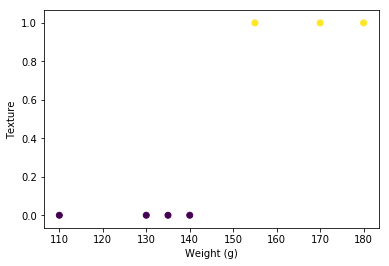

In [7]:
# Plot the data
color = (y == 'Orange') # a way to assign a different colour to our labels
plt.scatter(x[:,1], x[:,0], c = color)
plt.xlabel('Weight (g)')
plt.ylabel('Texture');

Use logistic regression to classify your fruit. _Rough_ and $160$g of weight.

#### Create classifier model

It is very easy to implement a classifier using `sklearn` library, we already imported `tree` containing objects we need to use decision tree.

Decision Trees (DTs) are a non-parametric supervised learning method. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In simple words, Decision tree makes the decision based on the input that was provided.



In [8]:
# Define the classifier
clf = DecisionTreeClassifier()

#### Train the model

As usual, all the machine learning classifiers in `sklearn` have the method `fit` to train the model on our data.

In [9]:
clf = clf.fit(x, y)

#### Make predictions

In [10]:
x_test = np.array([[1, 160]])

In [11]:
print('Your trained algorithm prediction is %s' %clf.predict(x_test)[0])
print('You should obtain that the test fruit is an Orange')

Your trained algorithm prediction is Orange
You should obtain that the test fruit is an Orange


## Recursive Binary Splitting

Consider the earlier example of tree learned from titanic dataset. 

In the first split or the root, all attributes/features are considered and the training data is divided into groups based on this split. We have 3 features, so will have 3 candidate splits. 
Now, we will calculate how much accuracy each split will cost us, using a cost function. 
The split that costs least is chosen, which in our example is sex of the passenger. This algorithm is recursive in nature as the groups formed can be sub-divided using same strategy. Due to this procedure, this algorithm is also known as the __greedy algorithm__, as we have an excessive desire of lowering the cost. This makes the root node as best predictor/classifier.

### Cost of a split

Let's take a closer look at cost functions used for classification and regression. 

__Regression__

$$ J(\beta) = \frac{1}{2n} \sum (h_\beta(x_i) - y_i)^2\, .$$

__Classification__

$$ J(\beta) = \frac{1}{n} \sum y_i h_\beta(x_i) + (1 - y_i) (1 - h_\beta(x_i))\, .$$

In both cases the cost functions try to find most homogeneous branches, or branches having groups with similar responses. This makes sense we can be more sure that a test data input will follow a certain path.

Let's say, we are predicting the price of houses. Thus, we are in a typical _regression_ problem. 
Now the decision tree will start splitting by considering each feature in training data. The mean of responses of the training data inputs of particular group is considered as prediction for that group. 

The cost function is applied to all data points and cost is calculated for all candidate splits. Again the split with lowest cost is chosen. Another cost function involves reduction of standard deviation. 
A curious reader may find more about it [here](http://www.saedsayad.com/decision_tree_reg.htm).

### When to stop splitting?

You might ask when to stop growing a tree? This is an excellent question!

As a problem usually has a large set of features, it results in large number of split, which in turn gives a huge tree. 
Such trees are _complex and can lead to overfitting_ (we will do in depth later on). So, we need to know when to stop.
One way of doing this is to set a minimum number of training inputs to use on each leaf. For instance, we can use a minimum of $10$ passengers to reach a decision (died or survived), and ignore any leaf that takes less than such a number of passengers. 
Another way is to set _maximum depth_ of your model. 
__Maximum depth__ refers to the the length of the longest path from a root to a leaf.

#### Pruning

The performance of a tree can be further increased by _pruning_. This is a technique of feature reduction and involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.

Pruning can start at either root or the leaves. The simplest method of pruning starts at leaves and removes each node with most popular class in that leaf, this change is kept if it doesn't deteriorate accuracy. Its also called reduced error pruning. More sophisticated pruning methods can be used such as cost complexity pruning where a learning parameter $\alpha$ is used to weigh whether nodes can be removed based on the size of the sub-tree. This is also known as weakest link pruning.

## Exercise

Use the data contained in `Data/Exercises/ionosphere_data.csv` to predict whether the vector 

```python
    x_test = [0.0, 0.0, 1.0, 0.95161, 1.0, 1.0, 0.2163, 1.0, 0.77152, -0.16399, 0.0, 0.0, 0.0, 0.0, -1.0,
              -0.34, 0.75, 0.3933, -1.0, 0.54467, -0.1321, 1.0, 0.0, 0.0, 1.0, 0.0, 0.51613, 1.0, 1.0, -0.9213,
              0.75682, 1.0, 0.32382, 1.0]
```
Corresponding to a new measure, has label $g$ (good) or $b$ (bad).

You can choose to use logistic regression or decision tree. We are going to explore in the next lectures how to determine which is the best classifier choice.

In [12]:
df_iono = pd.read_csv('Data/Exercises/ionosphere_data.csv') # write the code to import the dataframe

It should look like this

In [13]:
df_iono.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


#### Create the X-matrix and label vector y

In [14]:
X_df = df_iono.iloc[:, :-1] # Exclude the last column, containing labels
X = X_df.to_numpy() # Transform into a numpy array

In [15]:
y = np.array(df_iono.label)

In [16]:
# Define classifier
clf = DecisionTreeClassifier()

In [17]:
clf = clf.fit(X,y)

#### Define the x_test

In [18]:
x_test = np.array([[0.0, 0.0, 1.0, 0.95161, 1.0, 1.0, 0.2163, 1.0, 0.77152, -0.16399, 0.0, 0.0, 0.0, 0.0, -1.0,
              -0.34, 0.75, 0.3933, -1.0, 0.54467, -0.1321, 1.0, 0.0, 0.0, 1.0, 0.0, 0.51613, 1.0, 1.0, -0.9213,
              0.75682, 1.0, 0.32382, 1.0]])

#### Prediction

In [19]:
prediction = clf.predict(x_test)

if prediction == 'g':
    pred = 'good'
elif prediction == 'b':
    pred = 'bad'
else:
    raise ValueError('Something terrible happened')

print('Your prediction is %s' %pred)
print('You should get good')

Your prediction is good
You should get good


### Working Example

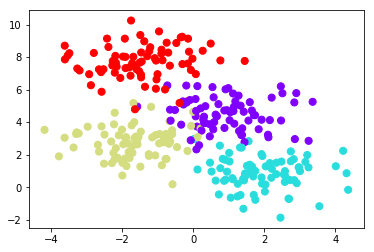

In [20]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. This figure presents a visualization of the first four levels of a decision tree classifier for this data.

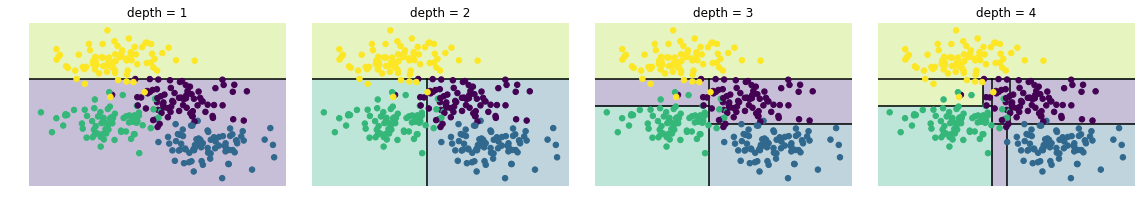

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

#### Visualise classifier output

Let's write a quick utility function to help us visualize the output of the classifier.

In [22]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now, we can call the function on our classifier.

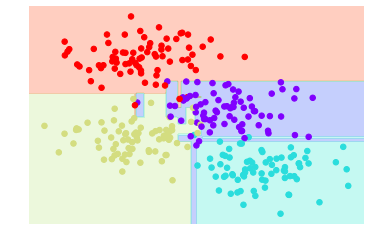

In [23]:
visualize_classifier(DecisionTreeClassifier(), X, y)

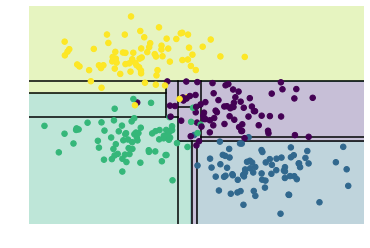

In [24]:
plot_tree_interactive(X, y);

Notice that as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions. It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data. That is, this decision tree, even at only five levels deep, is clearly over-fitting our data.

#### Overfitting

Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. Another way to see this over-fitting is to look at models trained on different subsets of the data—for example, in this figure we train two different trees, each on half of the original data.

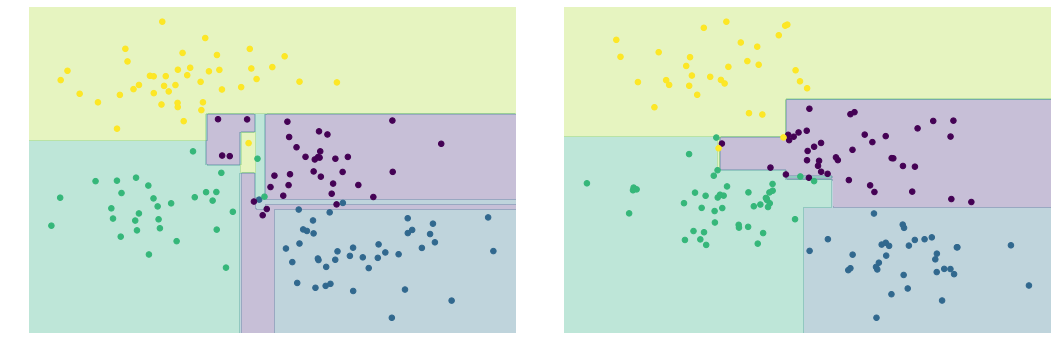

In [25]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])

It is clear that in some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two clusters). The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result!

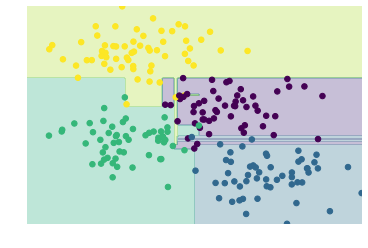

In [26]:
randomized_tree_interactive(X, y)

Just as using information from two trees improves our results, we might expect that using information from many trees would improve our results even further.

## Random Forest

Random forests are an example of an _ensemble learner_ built on decision trees. As the name may suggest, a forest is a collection of trees.

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

This type of bagging classification can be done manually using Scikit-Learn's `BaggingClassifier` meta-estimator.

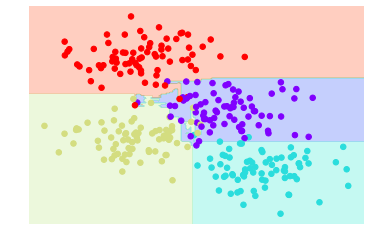

In [27]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points. In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features. You can read more technical details about these randomization strategies in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and references within.

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator, which takes care of all the randomization automatically. All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees:

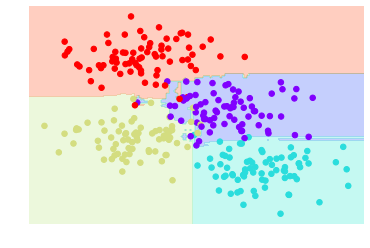

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

Definitely better! We see that by averaging over $100$ randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

## Exercise: Random Forest for Classifying Digits

Try to classify hand-written digits data with the corresponding labels.

In [29]:
digits = load_digits()
digits.keys()

dict_keys(['target', 'images', 'DESCR', 'data', 'target_names'])

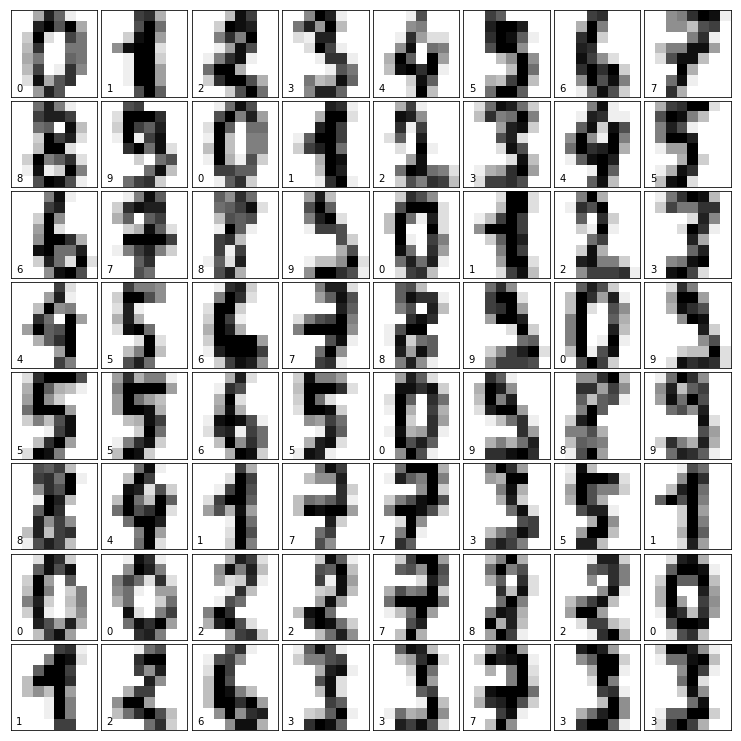

In [30]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=42)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [32]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.95      0.97        39
           2       1.00      1.00      1.00        38
           3       0.93      1.00      0.97        43
           4       1.00      0.98      0.99        56
           5       0.98      0.95      0.97        61
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.96      0.98      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Conclusions

This lecture contained a brief introduction to the concept of _ensemble estimators_, and in particular the random forest – an ensemble of randomised decision trees. 

Random forests are a powerful method with several advantages:

* Both training and prediction are very fast, because of the simplicity of the underlying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.
* The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability (accessed in Scikit-Learn with the `predict_proba()` method).
* The nonparametric model is extremely flexible, and can thus perform well on tasks that are under-fit by other estimators.

A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the meaning of the classification model, random forests may not be the best choice.

## Exercises

### HARD ONE: Build your own tree

Here we implement a class `myDecisionTree`.

__Hint__: Decision trees are recursive structure. Your code should reflect this recursivity.

Since we want to be recursive, we made use of an helper class we called `Node`

In [34]:
class myDecisionTree:
  
    def fit(self, X, y, min_leaf = 5):
        self.dtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
        return self
  
    def predict(self, X):
        return self.dtree.predict(X.values)


class Node:
    """
        Helper class for decision tree.
        At each node we have to compute a choice score, so we define the Node object with its properties.
        Node class represents one decision point in our model.
        
        idxs stores the indexes of the subset of the data that this Node is working with.
    """

    def __init__(self, x, y, idxs, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        """
            Function computing the split score. 
            If no such feature is found (then we are at a leaf node) so do nothing. 
            It makes use of find_better_split
        """
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') 
    
    def find_better_split(self, var_idx):
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]

    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
    
    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)

Let's try to give some comments on the code above.

Each division within the model has 2 possible outcomes for finding a solution — go to the left or go to the right. That decision point also divides our data into two sets.

Prediction at a node is based on the `value` attribute at each node. 
To make that prediction we are just going to take the average of the data of the dependent variable for each Node.

The method `find_varsplit` finds where should we split the data. 
We define it as follows.

```python
    def find_varsplit(self):
    """
        Function computing the split score. 
        If no such feature is found (then we are at a leaf node) so do nothing. 
        It makes use of find_better_split
    """
    for c in range(self.col_count): self.find_better_split(c)
    if self.is_leaf: return
    x = self.split_col
    lhs = np.nonzero(x <= self.split)[0]
    rhs = np.nonzero(x > self.split)[0]
    self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
    self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
```

With the function `find_better_split` we are trying to split on each data point and let the best split wins.
We are going to create our split such that it has as low standard deviation as possible. 
We find the split that minimizes the weighted averages of the standard deviations which is equivalent to minimizing RMSE (_Root Mean Squared Error_).
If we find a better split we store the following information: __index of the variable__, __split score__ and __value of the split__.
The score is a metric that tells us how effective the split was (note that leaf nodes do not have scores, so it will be infinity). The method `find_score` calculates a weighted average of the data. If the score is lower than the previous we have a better split. 

Note that the score is initially set to infinity in the ``__init__`` of the class. Thus, only leaf nodes and really shallow trees (and Thanos) have a score of infinity.
Finally, let’s look at how we use all this to make predictions, _i.e._ `predict` and `predict_row` methods.

```python
    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)
```

Once again, we are exploiting the recursive nature of life. 
Starting at the tree root, `predict_row` checks if we need to go left or right node based on the split value we found. The recursion ends once we hit a leaf node. At that point, the answer/prediction is stored in the `val` property.

Let's check how this works on data.

In [38]:
regressor = myDecisionTree().fit(X_df, y)
preds = regressor.predict(X_df)